## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

In [208]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [183]:
df_bike = pd.read_csv('Ch5_bike_station_locations.csv')
df_bike.head()

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620


In [184]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   244 non-null    float64
 1   longitude  244 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [185]:
df_bike.describe()

,latitude,longitude
count,244.000000,244.000000
mean,38.914289,-77.010109
std,0.035435,0.041084
min,38.827425,-77.106502
25%,38.891574,-77.031987
50%,38.916397,-77.011474
75%,38.935887,-76.985866
max,38.987980,-76.919470


In [186]:
scaler = StandardScaler()
df_bike[['latitude', 'longitude']] = scaler.fit_transform(df_bike[['latitude', 'longitude']])

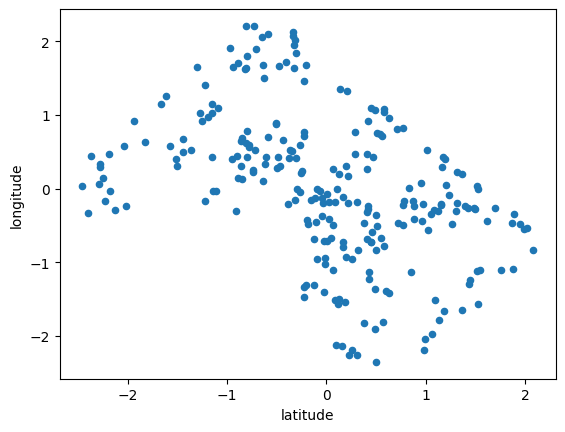

In [187]:
df_bike.plot(x='latitude', y='longitude', kind='scatter')
plt.show()

### 1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

In [188]:
X_bike = df_bike[['latitude', 'longitude']]

In [189]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X_bike)

KMeans(n_clusters=3)

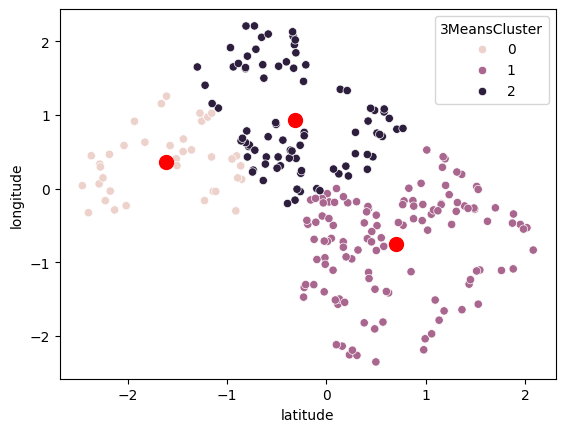

In [190]:
df_bike['3MeansCluster'] = kmeans3.labels_
sns.scatterplot(x='latitude', y='longitude', hue='3MeansCluster', data=df_bike)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, c='red') 
plt.show()

In [191]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X_bike)

KMeans(n_clusters=4)

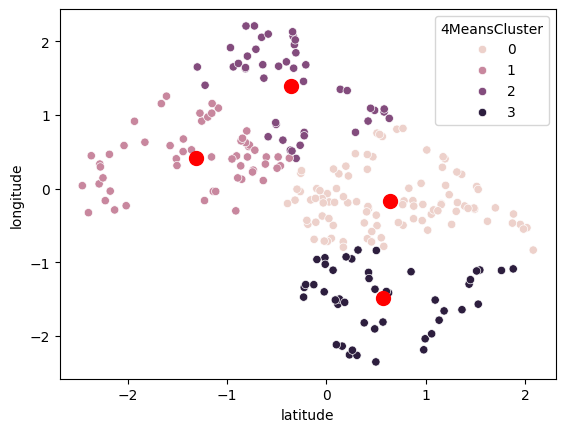

In [192]:
df_bike['4MeansCluster'] = kmeans4.labels_
sns.scatterplot(x='latitude', y='longitude', hue='4MeansCluster', data=df_bike)
plt.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], s=100, c='red')
plt.show()

scaling ?

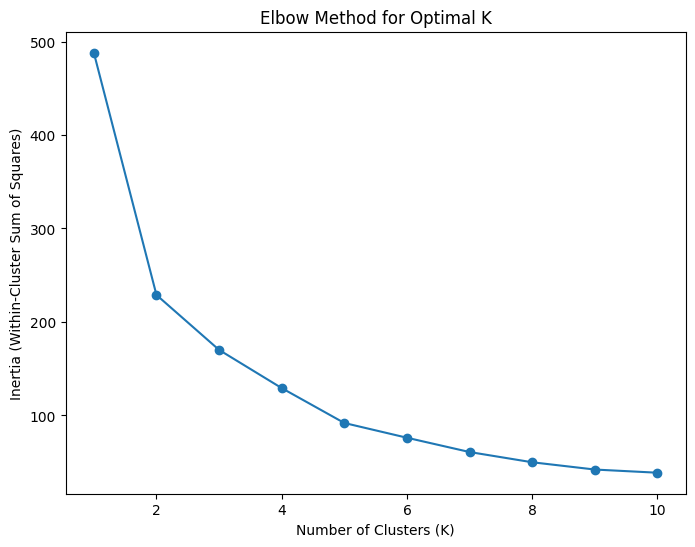

In [193]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_bike)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()
print()

In [194]:
for i in range(1, len(inertia)):
    print('k={0}: {1}'.format(i, inertia[i-1] - inertia[i]))

k=1: 259.0859372433326
k=2: 58.77213850391385
k=3: 40.84709420017279
k=4: 37.32111032183815
k=5: 15.774742416904047
k=6: 15.285644489664975
k=7: 10.943574152258506
k=8: 7.777284068059075
k=9: 3.4049084896399293


Based on the elbow plot, inertia drops sharply until k=5 and then levels off, so choosing 5 clusters captures most of the structure without unnecessary complexity. 

### 2. Visualize the K-Means clustering result for the best K.

In [195]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X_bike)

KMeans(n_clusters=5)

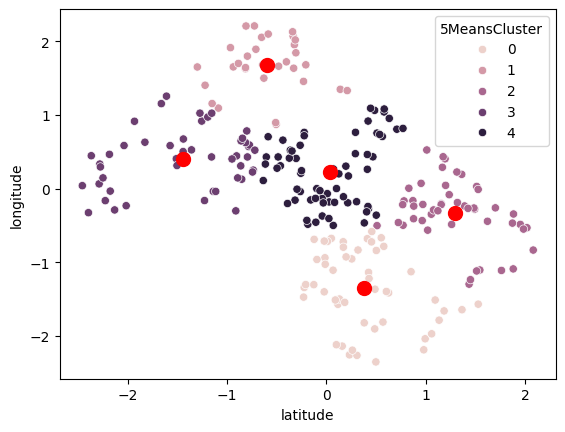

In [196]:
df_bike['5MeansCluster'] = kmeans5.labels_
sns.scatterplot(x='latitude', y='longitude', hue='5MeansCluster', data=df_bike)
plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], s=100, c='red')
plt.show()

### 3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.

In [198]:
aggClustering = AgglomerativeClustering(n_clusters=3)
aggClustering.fit(X_bike)

AgglomerativeClustering(n_clusters=3)

In [200]:
df_bike["3aggCluster"] = aggClustering.labels_
df_bike["3aggCluster"]

0      0
1      1
2      0
3      2
4      0
      ..
239    0
240    1
241    2
242    1
243    2
Name: 3aggCluster, Length: 244, dtype: int64

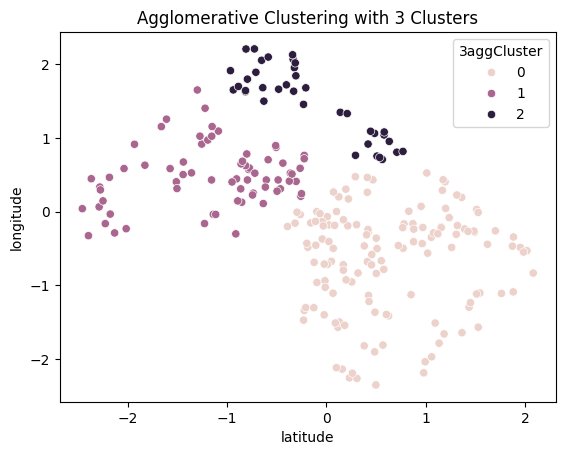

In [201]:
sns.scatterplot(x='latitude', y='longitude', hue='3aggCluster', data=df_bike)
plt.title("Agglomerative Clustering with 3 Clusters")
plt.show()

In [206]:
def aggClustering(n):
    aggClustering = AgglomerativeClustering(n_clusters=n)
    aggClustering.fit(X_bike)
    df_bike["aggCluster{0}".format(n)] = aggClustering.labels_
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='latitude', y='longitude', hue= "aggCluster{0}".format(n), data=df_bike)
    plt.title("Agglomerative Clustering with {0} Clusters".format(n))
    plt.show()

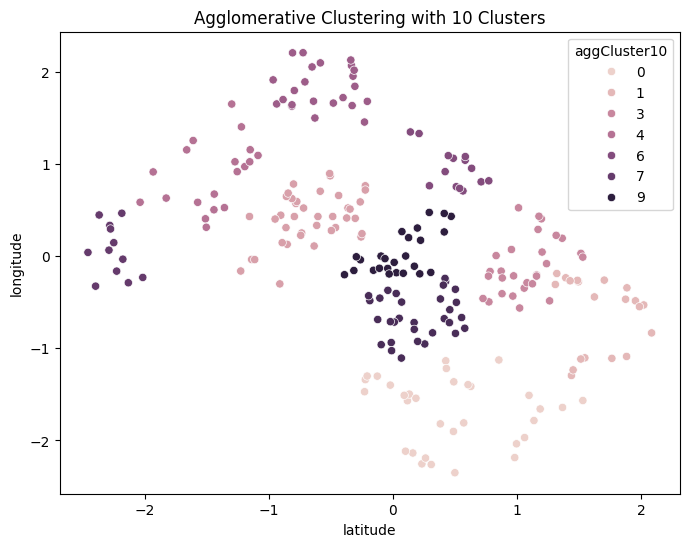

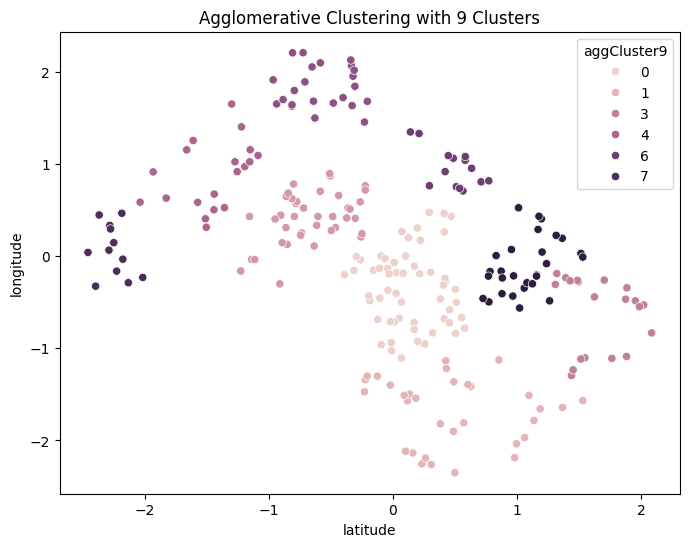

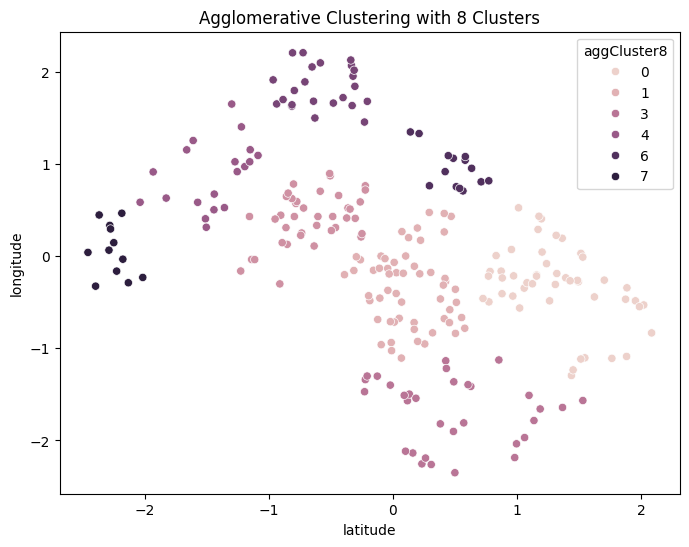

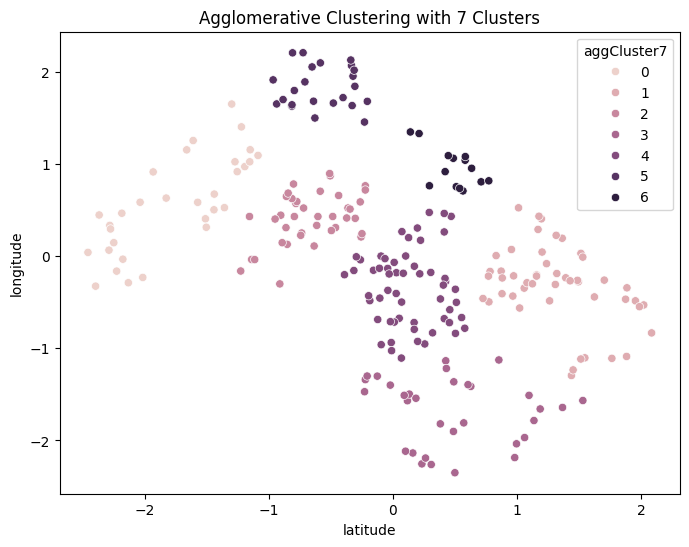

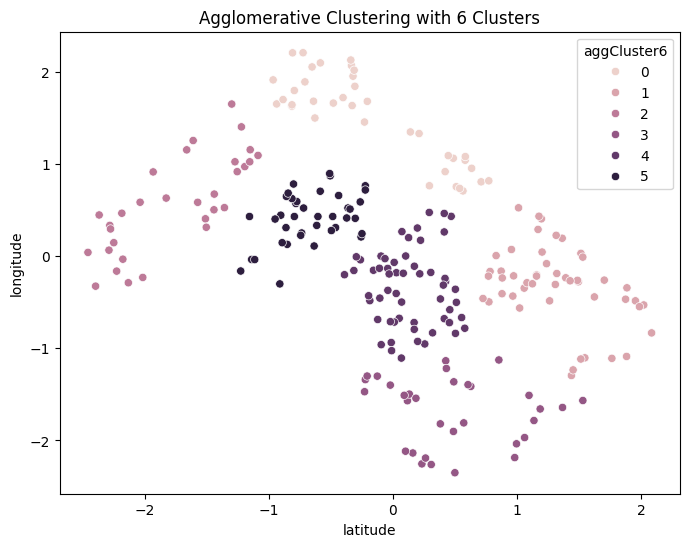

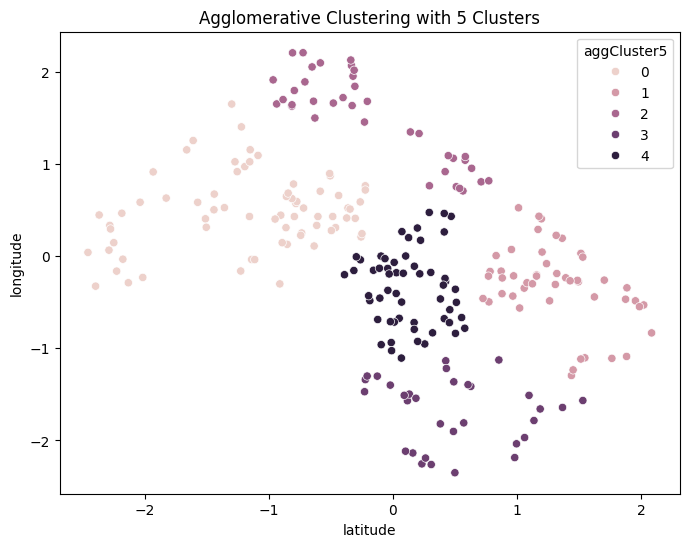

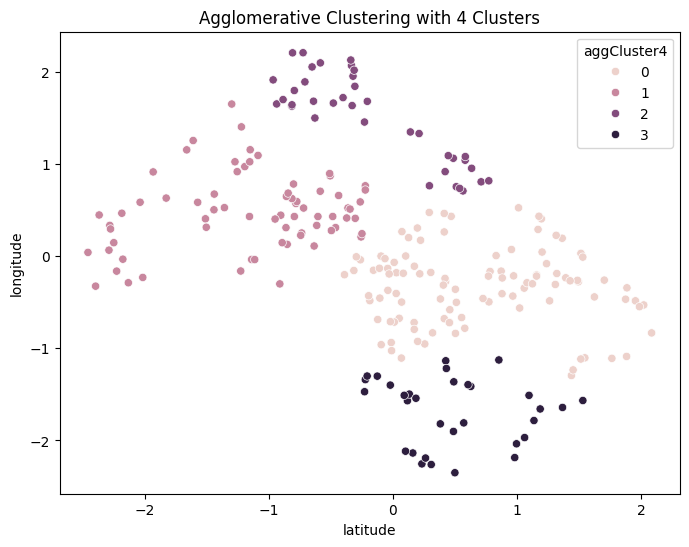

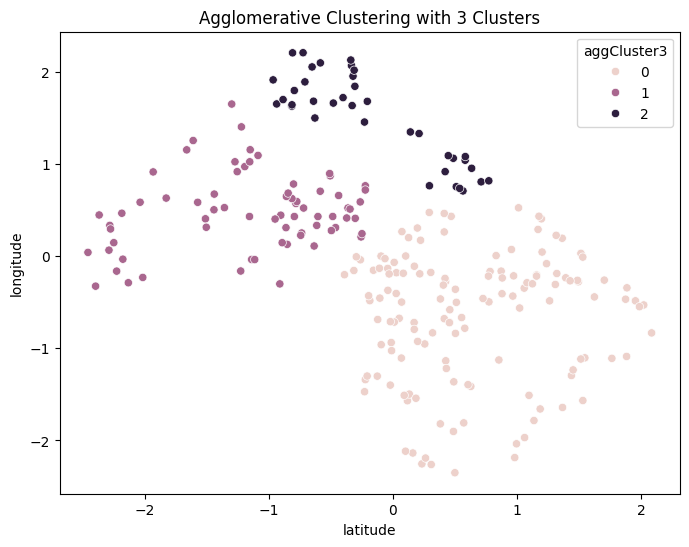

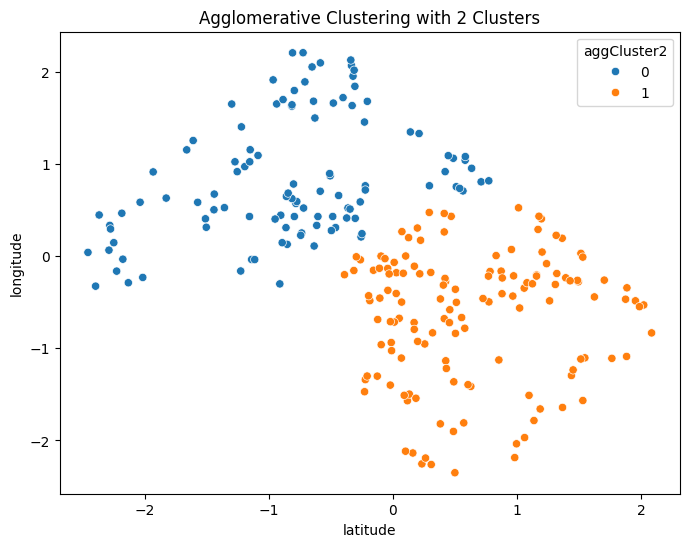

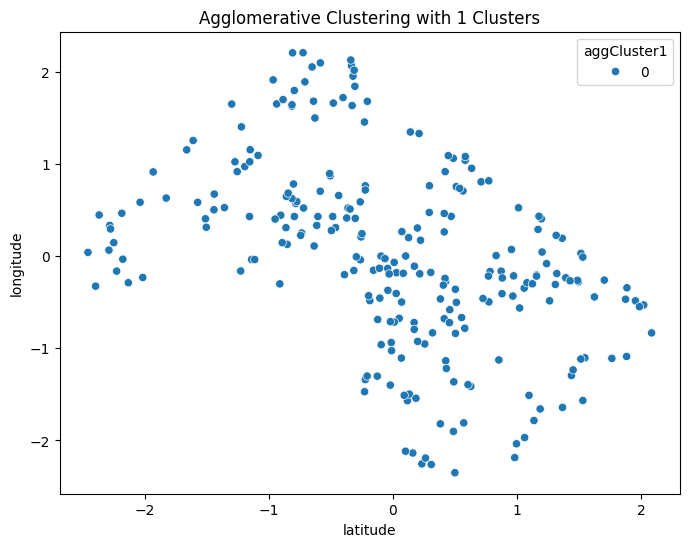

In [207]:
for cn in range(10, 0, -1):
    aggClustering(cn)

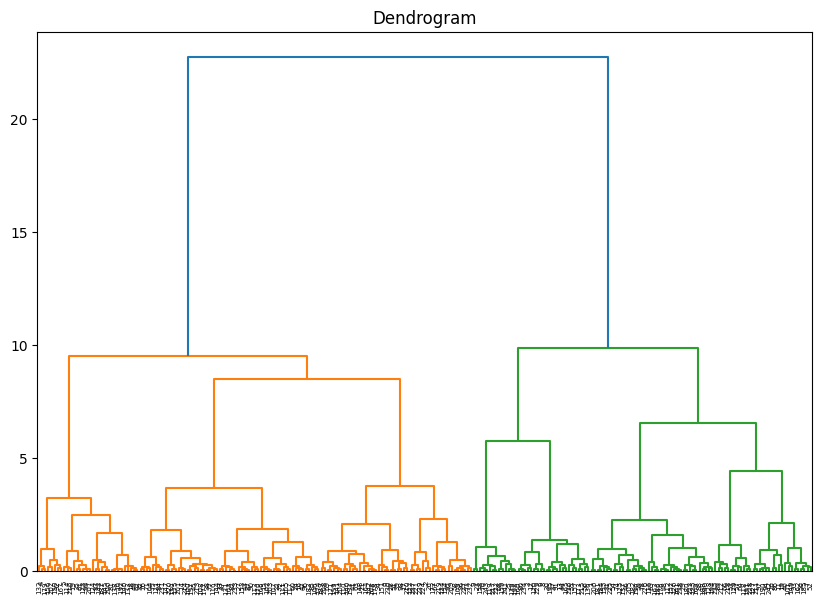

In [209]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_bike, method='ward'))
plt.show()

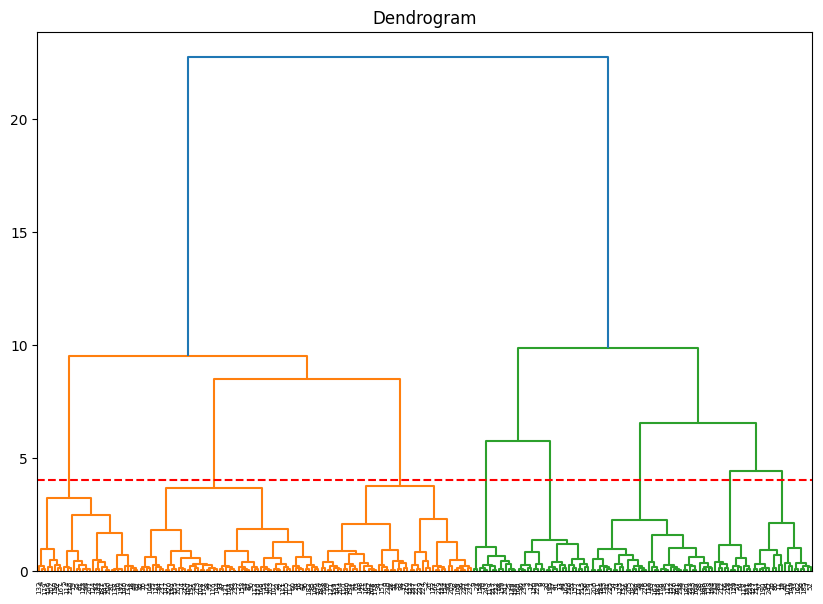

In [210]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_bike, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')
plt.show()